In [1]:
from sympy import symbols
from numpy import linspace
from sympy import lambdify, Function
from sympy.interactive import printing
printing.init_printing(use_latex = True)
import matplotlib.pyplot as mpl
import sympy as sp
import sys

In [2]:
def TanhMethodMMS(n,B):
    # inputs: 
    #   n - number of tanh functions
    #   B - the slope around the inflection point
    
    # outputs:     
    # initialize lists for the tanh function
    RightKink  = []
    LeftKink   = []
    
    # amplitude for each wave
    A          = []
    
    # maximum allowed amplitude 
    max_amplitude = 0.75
   
    # vertical shift along the y axis
    # one is chosed to keep the inflection points above 
    # zero
    S_vertical = 1
    
    # rj is the list of inflection point locations
    rj = list(linspace(1,0,n))
    r_min = 0
    r_max = 1
    
    # rescaling the radius (redundant but needed for BC Fairing Function)
    r_hat = (r - r_min)/(r_max - r_min)
    
    # messages for error and warning checking 
    warning_mssg = {1:'Warning: Total Amplitude exceeds maximum ', \
                    2:'Warning: Function is negative'}
    
    # getting amplitude for each kink
    for i in range(len(rj)):
        # 
        A.append(max_amplitude/(len(rj)+1))
        if sum(A) > max_amplitude:
            sys.exit(str(warning_mssg[1]))
    
    # defining kinks and antikinks
    for j in range(len(rj)):
        RightKink.append( A[j]*sp.tanh(B*( r_hat    - rj[j] )) )
        LeftKink.append(  A[j]*sp.tanh(B*( rj[j]- rj[0] )) )   
    
    f = sum(LeftKink) + sum(RightKink) + S_vertical
    return f

In [3]:
r = sp.IndexedBase('r')
n = 9 # number of kinks
B = 1000
debug = 0

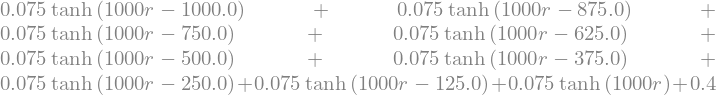

In [4]:
f = TanhMethodMMS(n,B)


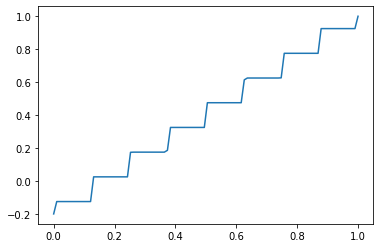

In [5]:

lam_x = lambdify(r,f , modules=['numpy'])

x_vals = linspace(0, 1, 100)
y_vals = lam_x(x_vals)

if debug == 1:
    for i in range(len(y_vals)):
        if y_vals[i] < 0:
            sys.exit(str(warning_mssg[2]))
        
mpl.plot(x_vals, y_vals)
mpl.show()

In [6]:
r_min = 0
r_max = 1
r_hat = (r - r_min)/(r_max - r_min)
f_min = f.subs(r,r_min)
f_max = f.subs(r,r_max)
f_min_desired = 0
f_max_desired = 0.5
A_max         = 3*r_hat**2 - 2*r_hat**3
A_min         =  1 - A_max 

 
del_f_min = abs(f_min - f_min_desired)
del_f_max = abs(f_max - f_max_desired)

f_imposed = (f + A_min*del_f_min - A_max*del_f_max)

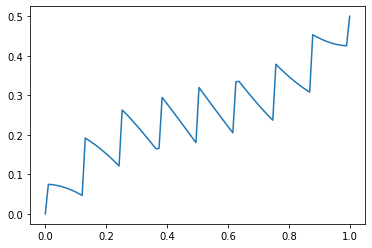

-(0.075*tanh(1000) + 0.425)*(-2*r**3 + 3*r**2) + 0.075*tanh(1000*r - 1000.0) + 0.075*tanh(1000*r - 875.0) + 0.075*tanh(1000*r - 750.0) + 0.075*tanh(1000*r - 625.0) + 0.075*tanh(1000*r - 500.0) + 0.075*tanh(1000*r - 375.0) + 0.075*tanh(1000*r - 250.0) + 0.075*tanh(1000*r - 125.0) + 0.075*tanh(1000*r) + 0.4*r**3 - 0.6*r**2 + 0.6


In [7]:
lam_x = lambdify(r_hat,f_imposed , modules=['numpy'])
    
x_vals = linspace(0, 1, 100)
y_vals = lam_x(x_vals)

if debug == 1:
    for i in range(len(y_vals)):
        if y_vals[i] < 0:
            sys.exit(str(warning_mssg[2]))
        
mpl.plot(x_vals, y_vals)
mpl.show()
print(f_imposed)